In [1]:
import random
import string
import RNA
import numpy as np
import pandas as pd
import os
import subprocess
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
os.chdir("../../src")
import merge_recursive
import merge_composition
os.chdir("../documents/benchmarks")

# Examples...

## Updated recursi

In [3]:
# simple example
sequence = "GAGGUGUAGUCCAGCCCUUAUUUGUUACCCGGCCGAUCCGAGAUAUGCACGUACGUCCAA"
s1 =       "((.(((((....(((........)))..(((.......)).)...))))).).)......"
s2 =       "((((.((......))))))..........(((.....)))...................."

sections = merge_composition.merge_check(sequence, s1, s2, Debug=False)
print (sections)
search_width_multiplier = 2
r = merge_recursive.recursive_merge(sequence, s1, s2, sections, search_width_multiplier=search_width_multiplier,\
    Verbose=True, new=True)

[1, [30, 40], 60]
Findpath outer section: [1, 60] excluding [[30, 40]] 
GAGGUGUAGUCCAGCCCUUAUUUGUUACCCGGCCGAUCCGAGAUAUGCACGUACGUCCAA
((.(((((....(((........)))..((.........).)...))))).).)...... [   0,    0 ]   2.00
.(.(((((....(((........)))..((.........).)...))))).)........ [  -1,  -54 ]   1.70
.(.(((((....(((........)))...(.........).....))))).)........ [ -29,  -42 ]   1.20
.(.((((.....(((........)))...(.........)......)))).)........ [  -8,  -46 ]   2.20
...((((.....(((........)))...(.........)......)))).......... [  -2,  -52 ]   2.60
...(((......(((........)))...(.........).......))).......... [  -7,  -47 ]   4.30
...((.......(((........)))...(.........)........)).......... [  -6,  -48 ]   7.20
...(........(((........)))...(.........).........).......... [  -5,  -49 ]   8.60
............(((........)))...(.........).................... [  -4,  -50 ]   4.70
.............((........))....(.........).................... [ -13,  -26 ]   5.40
..............(........).....(.........).......

In [4]:
# Recursive Merging

sequence = "UCGUGUAACCCGGGCCCCAUUAUGAAGUCCUUGGCACACGAUAGAUAGCACUGUGCAAGGUGUCCCAUUGACAGGUUUCGCAUAGGUCAG"
s1 =       "((((((..((.(((.(..........).))).)).))))))......(..((((((.(((((((.....))))..))).))))))..).."
s2 =       "((((((...((((((..((...))..).)).))).))))))......((.((((((....((((.....))))......))))))))..."

sections = merge_composition.merge_check(sequence, s1, s2, Debug=False)
print (sections)
search_width_multiplier = 2
r = merge_recursive.recursive_merge(sequence, s1, s2, sections, search_width_multiplier=search_width_multiplier,\
    Verbose=True, new=True)

# print (r.max_en, "runtimes:",  round(r.runtime,2), round(r.runtime_ext,2), round(r.runtime_merge,2), "s")

[1, [4, [14, 29], 38], [51, 85], 90]
Findpath outer section: [1, 90] excluding [[4, [14, 29], 38], [51, 85]] 
UCGUGUAACCCGGGCCCCAUUAUGAAGUCCUUGGCACACGAUAGAUAGCACUGUGCAAGGUGUCCCAUUGACAGGUUUCGCAUAGGUCAG
((((.................................))))......(..(.................................)..).. [   0,    0 ]   5.60
((((.................................)))).........(.................................)..... [ -48,  -88 ]   5.60
((((.................................)))).......(.(.................................)).... [  49,   86 ]   6.60
((((.................................))))......((.(.................................)))... [  48,   87 ]   5.00
S:   6.60 kcal/mol | B:   1.00 kcal/mol | E[start]:  5.60 E[end]:  5.00
Findpath outer section: [4, 38] excluding [[14, 29]] 
UCGUGUAACCCGGGCCCCAUUAUGAAGUCCUUGGCACACGAUAGAUAGCACUGUGCAAGGUGUCCCAUUGACAGGUUUCGCAUAGGUCAG
...(((..((.(((..............))).)).))).................................................... [   0,    0 ]  -2.50
...(((...(.(((........

# Dataset generation:

- 1000 sequences of lengths 50,100,150,200,300,400,500,600,800,1000
- RNAsubopt --> gradient walk of s1 & s2 to direct local minimum
- filter s1 <-> s2 if minimum basepair distance below 10


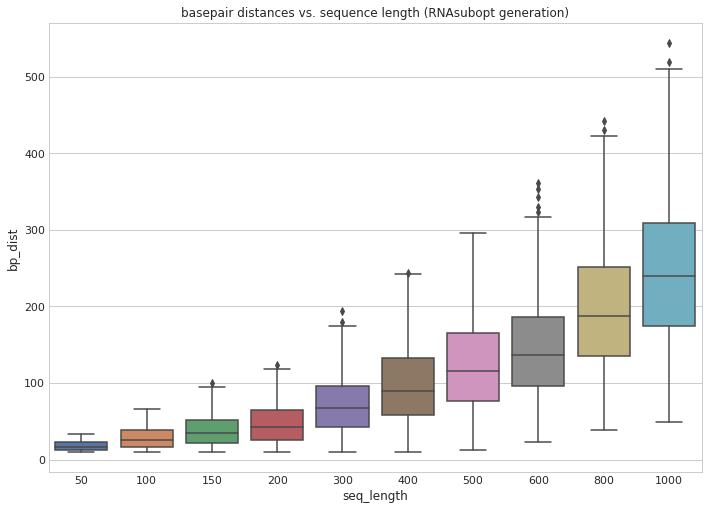

In [5]:
filename = "../../sample_seqs/scanned_sections_2.csv"
df = pd.read_csv(filename)

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('seaborn-whitegrid')
plt.title("basepair distances vs. sequence length (RNAsubopt generation)")
sns.boxplot(x="seq_length", y="bp_dist", data=df)
plt.show()

[9.6, 43.1, 66.6, 77.8, 90.1, 92.7, 96.6, 97.6, 99.2, 99.4] [0.9702757227242403, 0.8916945423619078, 0.835644208749009, 0.8106295818367356, 0.7766036921471964, 0.7458036647120928, 0.7214995285881884, 0.70009375066079, 0.6798282784393546, 0.6483706328594759]


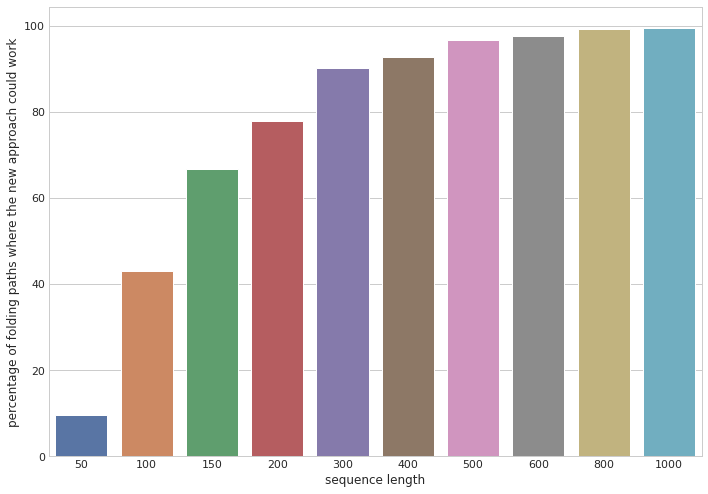

In [6]:
seq_lengths = [50,100,150,200,300,400,500,600,800,1000]

l = []
ls = []

for sl in seq_lengths:   
    l.append(np.sum(df.where(df["seq_length"]==sl)["recursion_depth"]>1)/10)
    ls.append(np.mean(df.where(df["seq_length"]==sl)["largest_section"]/df.where(df["seq_length"]==sl)["bp_dist"]   ))
    
print (l, ls)
    
ax = sns.barplot(x=seq_lengths, y=l)
ax.set(xlabel='sequence length', ylabel='percentage of folding paths where the new approach could work')
plt.show()


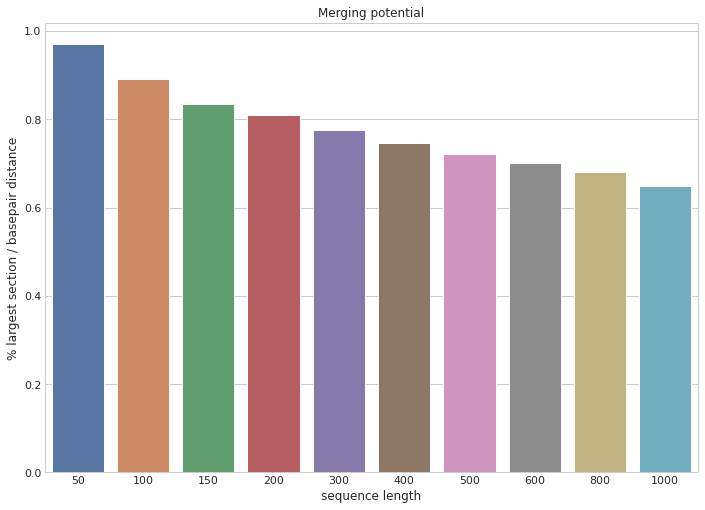

In [7]:
# percentage of the largest section (largest bp_dist / total bp_dist)

ax = sns.barplot(x=seq_lengths, y=ls)
ax.set(xlabel='sequence length', ylabel='% largest section / basepair distance')
plt.title("Merging potential")
plt.show()


<AxesSubplot:title={'center':'Merging potential'}, xlabel='seq_length', ylabel='p'>

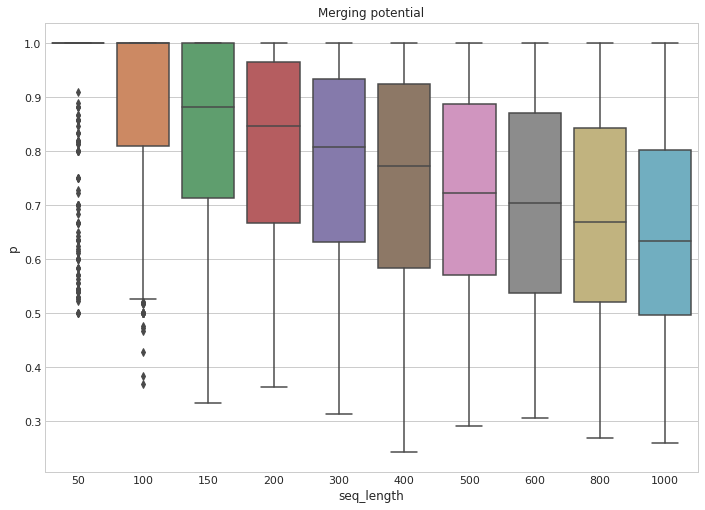

In [9]:
df["p"] = df["largest_section"]/df["bp_dist"]

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('seaborn-whitegrid')
plt.title("Merging potential")
sns.boxplot(x="seq_length", y="p", data=df)

# Runtime comparison

In [11]:
# https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

def plot_clustered_stacked(dfall, labels=None, title="",  H="/", **kwargs):
    """
    Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
    labels is a list of the names of the dataframe, used for the legend
    title is a string for the title of the plot
    H is the hatch used for identification of the different dataframe
    """

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.04, 0.6])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.04, 0.0]) 
    axe.add_artist(l1)
    return axe

# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["I", "J", "K", "L", "M"])

# exmample call
# plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"])    

In [12]:
def add_to_plot(filename, normalize=True):
    df = pd.read_csv(filename)
    runtimes_merge_findpath = df["runtimes_merge_findpath"]
    runtimes_merge_findpath_ext = df["runtimes_merge_findpath_ext"]
    
    runtimes_merge_findpath = np.sum(runtimes_merge_findpath)
    runtimes_merge_findpath_ext = np.sum(runtimes_merge_findpath_ext)
    
#     runtimes_merge_findpath_ext = df["runtimes_merge_findpath_ext"]
    runtimes_merge_join = df["runtimes_merge_join"]
    runtimes_merge_join_ext = df["runtimes_merge_join_ext"]
    
    runtimes_merge_join = np.sum(runtimes_merge_join)
    runtimes_merge_join_ext = np.sum(runtimes_merge_join_ext)
   
    runtimes_regular = df["runtimes_regular"]
    runtimes_regular_ext = df["runtimes_regular_ext"]
    
    runtimes_regular = np.sum(runtimes_regular)
    runtimes_regular_ext = np.sum(runtimes_regular_ext)
#     runtimes_regular_ext = df["runtimes_regular_ext"]

#     outer_runtimes = np.sum(outer_runtimes)
#     inner_runtimes = np.sum(inner_runtimes)
#     runtimes_merge_join = np.sum(runtimes_merge_join)

#     runtimes_regular = np.sum(runtimes_regular)

    if normalize:
        regular_findpath.append([runtimes_regular/(runtimes_regular+runtimes_regular_ext),runtimes_regular_ext/(runtimes_regular+runtimes_regular_ext),0,0])
        new_findpath.append([runtimes_merge_findpath/(runtimes_regular+runtimes_regular_ext), runtimes_merge_findpath_ext/(runtimes_regular+runtimes_regular_ext),\
                             runtimes_merge_join/(runtimes_regular+runtimes_regular_ext), runtimes_merge_join_ext/(runtimes_regular+runtimes_regular_ext)])
    else:
        regular_findpath.append([runtimes_regular, runtimes_regular_ext,0,0])
        new_findpath.append([runtimes_merge_findpath, runtimes_merge_findpath_ext, runtimes_merge_join, runtimes_merge_join_ext])
        
    print ("dataset", filename)
#     print (f"regular findpath:    avg. runtime: {np.mean(df['runtimes_regular']):4.4} s")
#     print (f"new findpath:        avg. runtime: {np.mean(df['runtimes_merge_outer'])+np.mean(df['runtimes_merge_inner']):4.4} s")
#     print (f"new findpath:  merge step runtime: {np.mean(df['runtimes_merge_join']):4.4} s")
    
    print ()

dataset local_min_300_multiple_sections_min10.csv_benchmark.csv

dataset local_min_400_multiple_sections_min10.csv_benchmark.csv

dataset local_min_500_multiple_sections_min10.csv_benchmark.csv

dataset local_min_600_multiple_sections_min10.csv_benchmark.csv



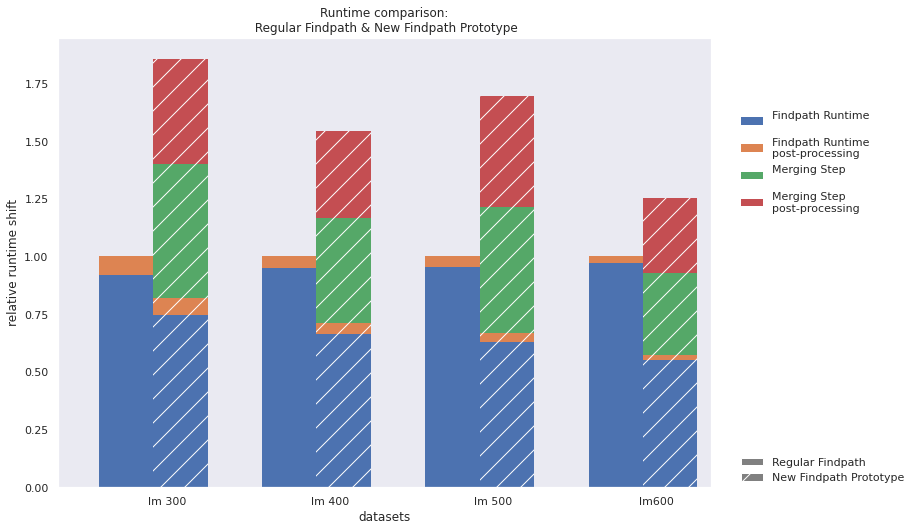

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# relative runtimes

normalize = True
# normalize = False

regular_findpath = []
new_findpath = []
# add_to_plot("local_min_300_multiple_sections.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_300_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_400_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_500_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_600_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)

# axis setup
all_indeces = ["Findpath Runtime\n", "Findpath Runtime\npost-processing", "Merging Step\n", "Merging Step\npost-processing"]
all_datasets=["lm 300", "lm 400", "lm 500", "lm600"]

# regular findpath
df1 = pd.DataFrame(regular_findpath, index=all_datasets, columns=all_indeces)
# New Findpath Prototype
df2 = pd.DataFrame(new_findpath, index=all_datasets, columns=all_indeces)

# stackoverflow function
plot_clustered_stacked([df1, df2],["Regular Findpath", "New Findpath Prototype"], title="Runtime comparison:\n Regular Findpath & New Findpath Prototype")
plt.ylabel('relative runtime shift')
plt.xlabel('datasets')
plt.savefig("runtimes_1_relative.png", bbox_inches='tight')
plt.savefig("runtimes_1_relative.svg", bbox_inches='tight')

# Barrier energy comparison

input: local_min_300_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 12.98 kcal/mol
input: local_min_300_multiple_sections_min10.csv_benchmark.csv,     new findpath mean barrier: 12.45 kcal/mol

input: local_min_400_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 15.33 kcal/mol
input: local_min_400_multiple_sections_min10.csv_benchmark.csv,     new findpath mean barrier: 14.21 kcal/mol

input: local_min_500_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 14.57 kcal/mol
input: local_min_500_multiple_sections_min10.csv_benchmark.csv,     new findpath mean barrier: 13.55 kcal/mol

input: local_min_600_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 17.39 kcal/mol
input: local_min_600_multiple_sections_min10.csv_benchmark.csv,     new findpath mean barrier: 14.95 kcal/mol



[Text(0.5, 1.0, '600 nt')]

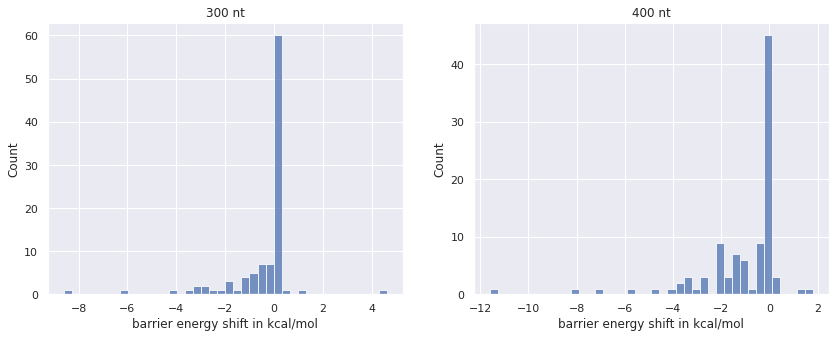

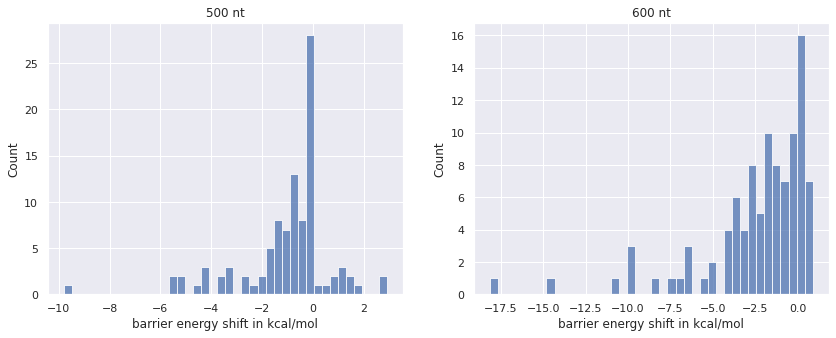

In [14]:
sns.set(rc={'figure.figsize':(14,5)})
# from pylab import *
# sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)


def add_to_histogram(filename, target_axis):   
    # saddle energy comparisons
    regular_findpath = []
    new_findpath = []
    
    df = pd.read_csv(filename)
    
    print (f"input: {filename}, regular findpath mean barrier: {df['results_barrier_findpath'].mean():2.2f} kcal/mol")
    print (f"input: {filename},     new findpath mean barrier: {df['results_barrier_merge'].mean():2.2f} kcal/mol")
    print ()
#     print (df["results_barrier_merge"].mean(), )
    barrier_energy_change = df["results_barrier_merge"] - df["results_barrier_findpath"]
    
    axes[target_axis].set(xlabel="barrier energy shift in kcal/mol")
    sns.histplot(barrier_energy_change, bins=40, ax=axes[target_axis])

    
fig, axes=plt.subplots(1,2)
filename = "local_min_300_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 0)
filename = "local_min_400_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 1)
axes[0].set(title="300 nt")
axes[1].set(title="400 nt")

fig, axes=plt.subplots(1,2)
filename = "local_min_500_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 0)
filename = "local_min_600_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 1)
axes[0].set(title="500 nt")
axes[1].set(title="600 nt")
# plt.savefig("energy_comparison_300.svg", bbox_inches='tight')